In [2]:
%%capture
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv

In [3]:
#@title 데이터 정제
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib as mpl

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumSquare.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumSquare')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumSquare'}) # 폰트 설정

mpl.rc('font', family='NanumSquare')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

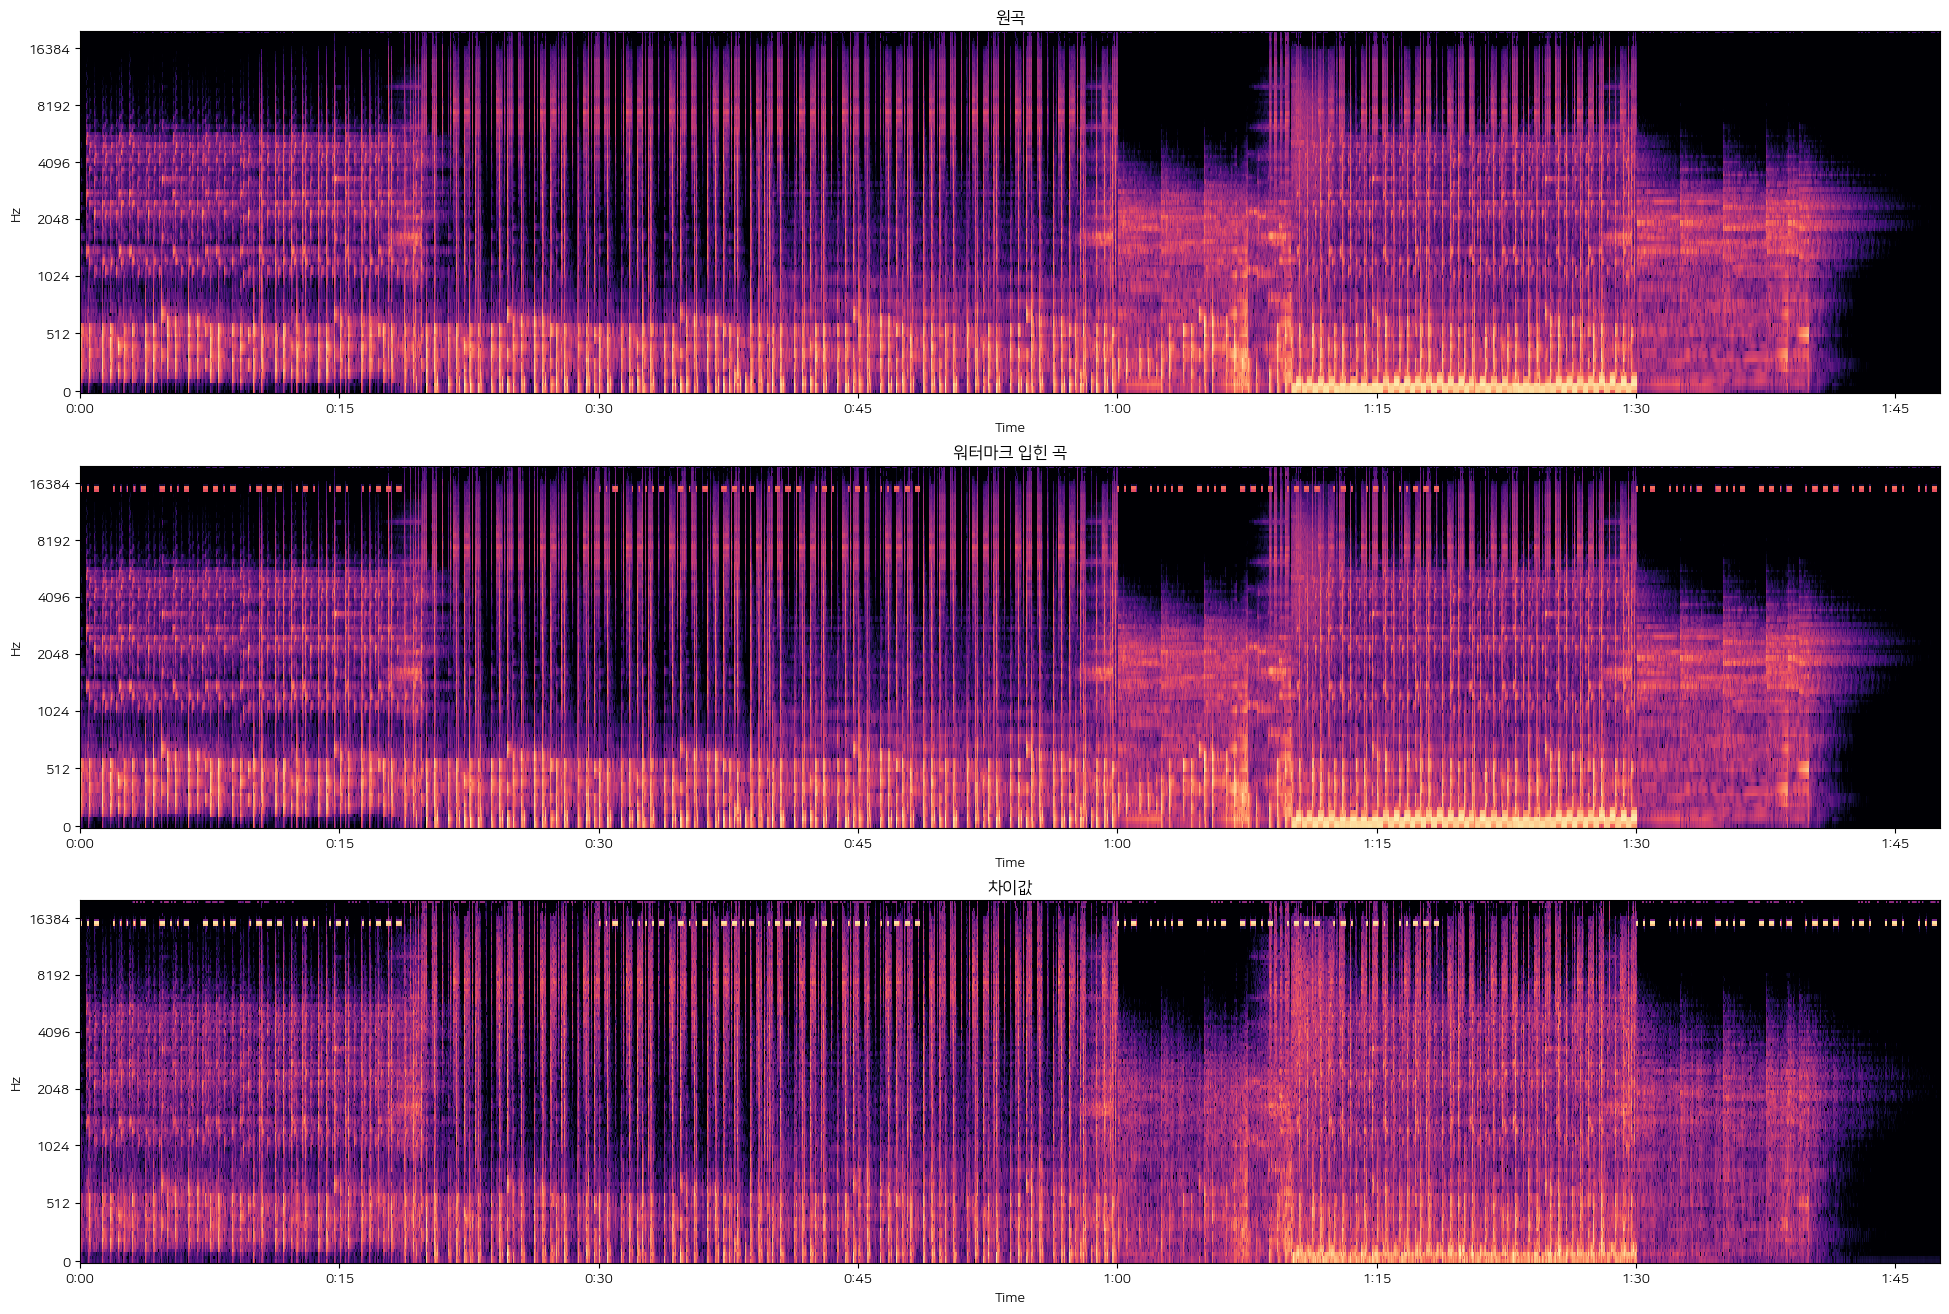

In [10]:
import librosa
import numpy as np


mpl.rcParams['font.family'] ='NanumSquare'
mpl.rcParams['axes.unicode_minus'] =False


or_file_path = 'EDM_Mango_Beach_01.mp3'
# or_file_path = '05_rock_golden_finger.wav'
or_sample_rate = librosa.get_samplerate(or_file_path)
wav1, _ = librosa.load(or_file_path, sr=or_sample_rate, mono=False)

wm_file_path = 'EDM_Mango_Beach_01_analog.mp3'
# wm_file_path = 'watermarked_Copy_of_05_rock_golden_finger.wav'
wm_sample_rate = librosa.get_samplerate(wm_file_path)
wav2, _ = librosa.load(wm_file_path, sr=wm_sample_rate, mono=False)

# wak _ = libros a.effects.trim(wav1)
# wav2, _ = librosa.effects.trim(wav2)

wav1_left, wav1_right = wav1
wav2_left, wav2_right = wav2
wav1_left = wav1_left[:len(wav2_left)]
wav1_right = wav1_right[:len(wav2_right)]

s1 = librosa.feature.melspectrogram(y=wav1_left, sr=or_sample_rate, n_mels=128, n_fft=1024, fmax=20000)
s2 = librosa.feature.melspectrogram(y=wav2_left, sr=wm_sample_rate, n_mels=128, n_fft=1024, fmax=20000)

plt.figure(figsize=(24, 16))

plt.subplot(3, 1, 1)
S_dB = librosa.power_to_db(s1, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=or_sample_rate, fmax=20000)
plt.title('원곡')

plt.subplot(3, 1, 2)
S_dB = librosa.power_to_db(s2, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=wm_sample_rate, fmax=20000)
plt.title('워터마크 입힌 곡')

plt.subplot(3, 1, 3)
S_dB = librosa.power_to_db(abs(s1 - s2), ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=or_sample_rate, fmax=20000)
plt.title('차이값')


plt.show()


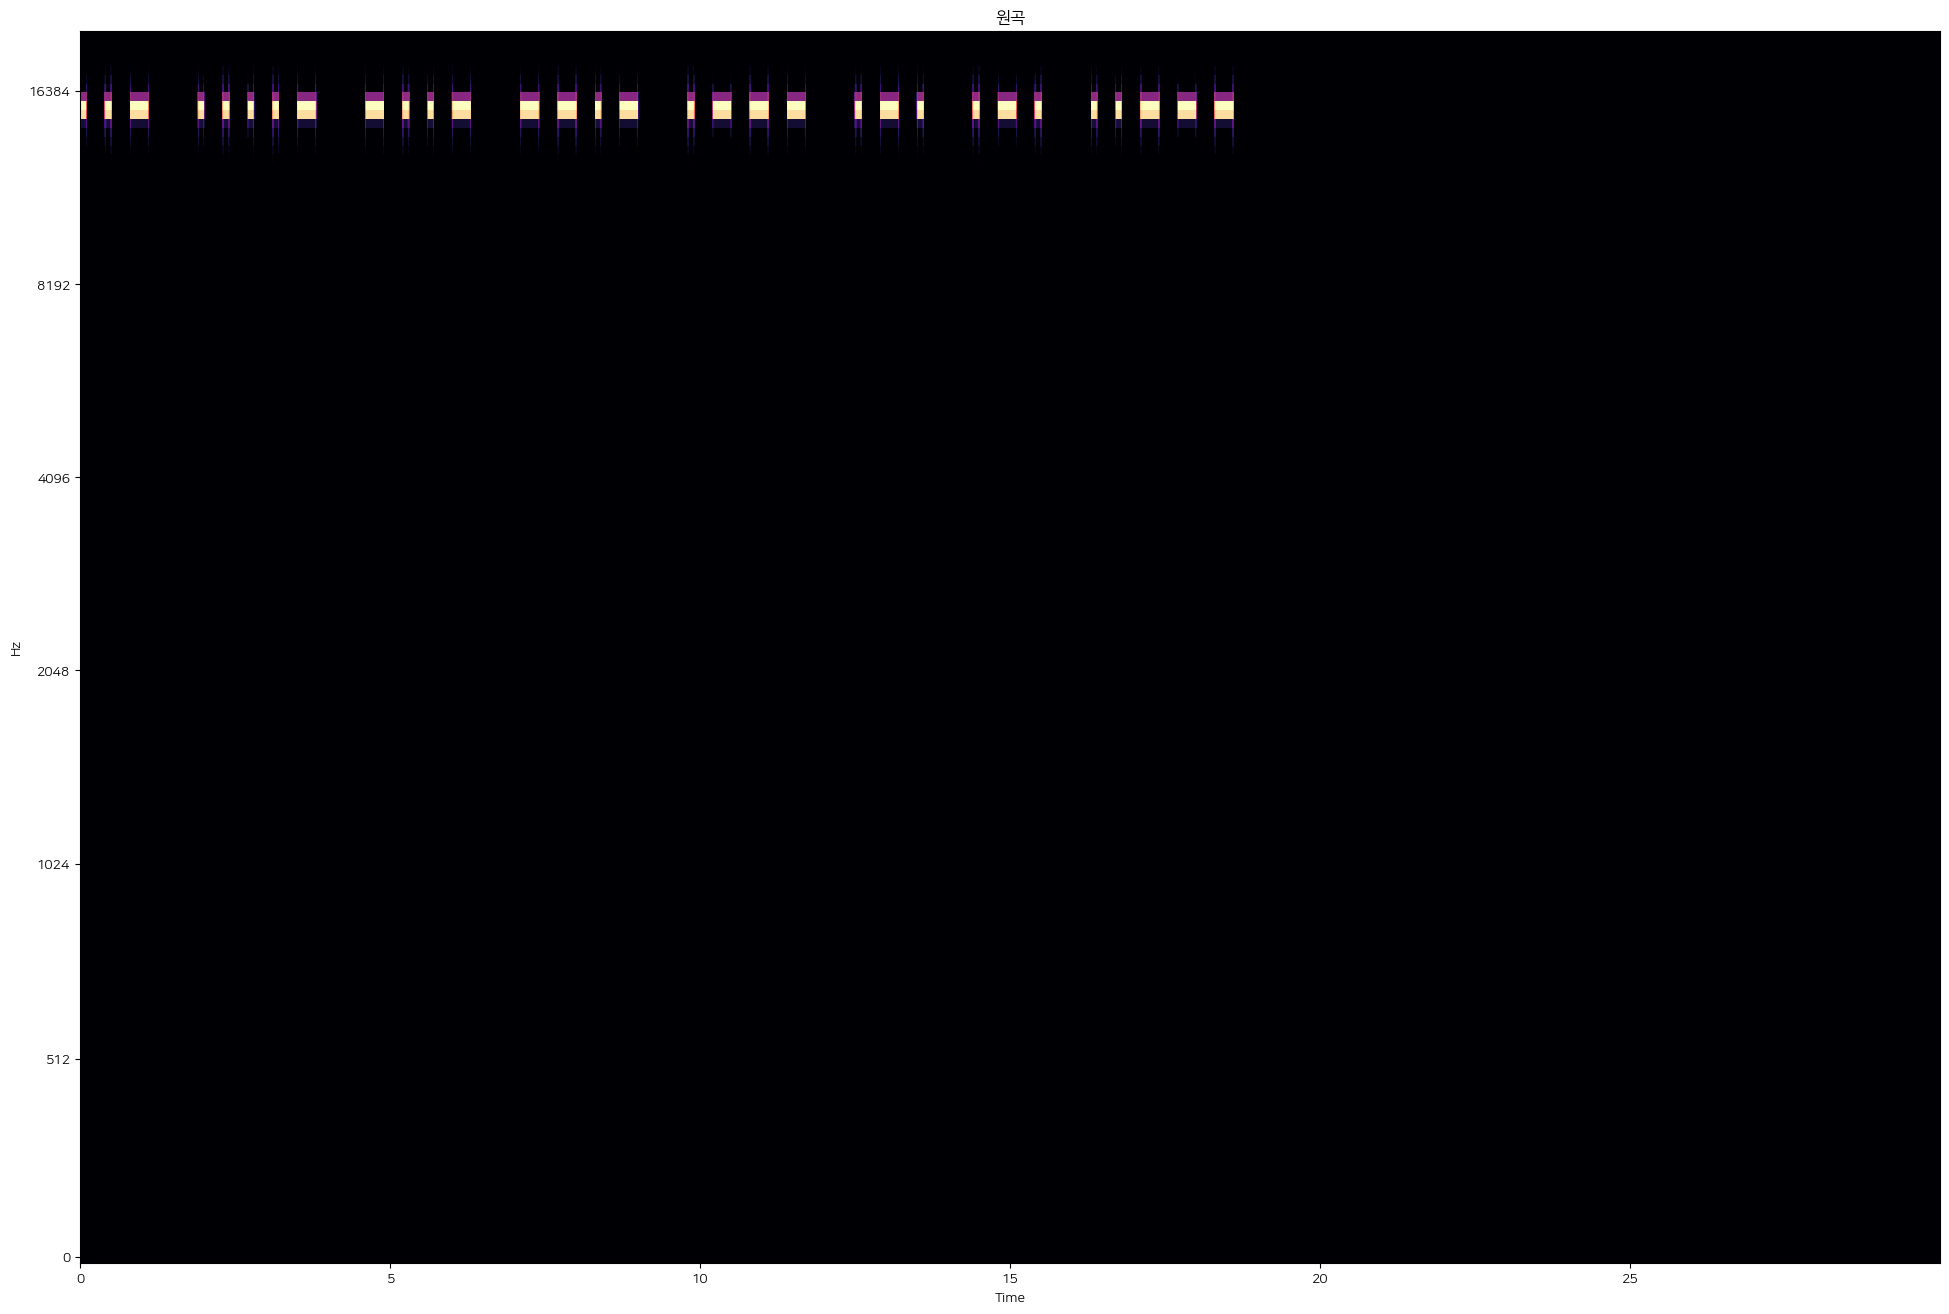

In [11]:
# wav1, _ = librosa.load('05_rock_golden_finger.wav', sr=44100, mono=False)
# wav2, _ = librosa.load('watermarked_Copy_of_05_rock_golden_finger.wav', sr=44100, mono=False)

file_path = 'EDM_Mango_Beach_01_code only.wav'

sample_rate = librosa.get_samplerate(file_path)
wav1, _ = librosa.load(file_path, sr=sample_rate, mono=False)


# wak _ = libros a.effects.trim(wav1)
# wav2, _ = librosa.effects.trim(wav2)

wav1_left, wav1_right = [wav1] * 2


s1 = librosa.feature.melspectrogram(y=wav1_left, sr=sample_rate, n_mels=128, n_fft=1024, fmax=20000)


plt.figure(figsize=(24, 16))

S_dB = librosa.power_to_db(s1, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=20000)
plt.title('원곡')

plt.show()


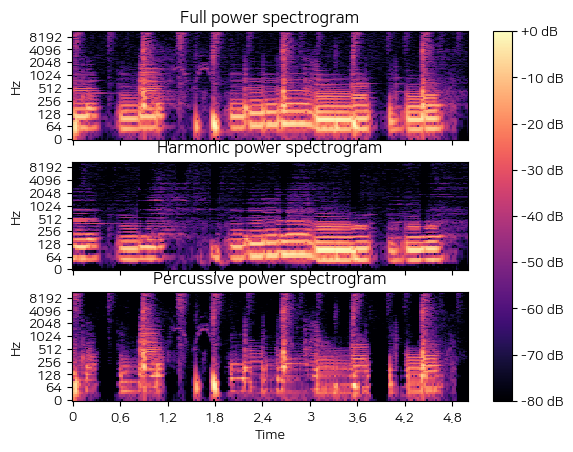

In [ ]:
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('choice'), duration=5)
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D)

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),
                                                       ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')